### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).  
Gdzie gradienty są bliskie zera?  
Czy uzyskany wynik pozwoliłby np. na detekcję obiektów?

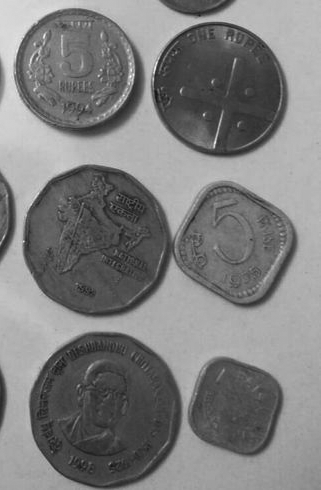

In [36]:
coins = cv2.imread('Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

In [37]:
#plt.imshow(coins, cmap='hot') # przykład wyświetlania z mapą kolorów

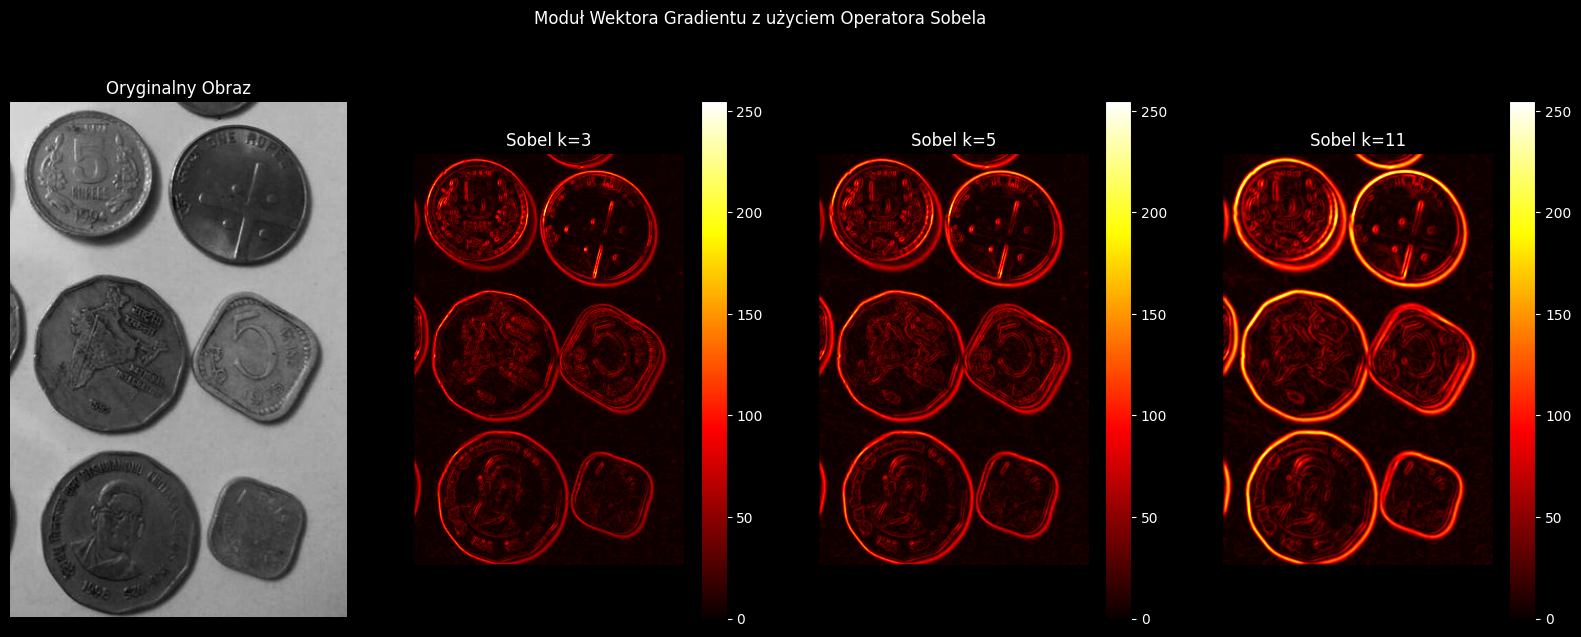

In [79]:
def gradient_magnitude(grad_x, grad_y):
    gradient_mag = np.sqrt(grad_x**2 + grad_y**2) # Obliczenie modułu wektora gradientu (normy euklidesowej)
    gradient_mag = np.uint8(gradient_mag / np.max(gradient_mag) * 255)  # Normalizacja do [0, 255]
    return gradient_mag

grad_x = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
grad_y = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
sobel_k3 = gradient_magnitude(grad_x, grad_y)

grad_x = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
grad_y = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobel_k5 = gradient_magnitude(grad_x, grad_y)

grad_x = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=11)
grad_y = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=11)
sobel_k11 = gradient_magnitude(grad_x, grad_y)

fig, axs = plt.subplots(1, 4, figsize=(20, 7), facecolor='black')
fig.suptitle('Moduł Wektora Gradientu z użyciem Operatora Sobela', color='white')

axs[0].imshow(coins, cmap='gray')
axs[0].set_title('Oryginalny Obraz', color='white')
axs[0].axis('off')

im1 = axs[1].imshow(sobel_k3, cmap='hot')
axs[1].set_title('Sobel k=3', color='white')
axs[1].axis('off')

im2 = axs[2].imshow(sobel_k5, cmap='hot')
axs[2].set_title('Sobel k=5', color='white')
axs[2].axis('off')

im3 = axs[3].imshow(sobel_k11, cmap='hot')
axs[3].set_title('Sobel k=11', color='white')
axs[3].axis('off')

imgs = [im1, im2, im3]

for i in range(0, 3):
    cbar = plt.colorbar(imgs[i], ax=axs[i+1])
    cbar.ax.yaxis.set_tick_params(color='white')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

plt.subplots_adjust(top=0.85)
plt.show()

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów. Wykorzystaj [filtr Canny'ego](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) do detekcji krawędzi; zbadaj jego zachowanie w zależności od wartości progów oraz sposobu redukcji szumu.

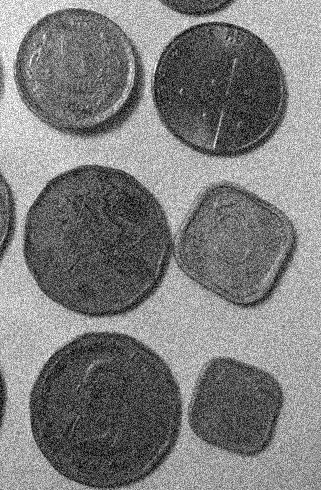

In [39]:
coins_noise = cv2.imread('Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

In [61]:
def filter(img, f_name, param):
    if f_name == 'Gauss':
        gauss = cv2.GaussianBlur(img, (param, param), 0)
        return gauss
    elif f_name == 'Median':
        median = cv2.medianBlur(img, param)
        return median


def canny_detection(img, f_name, f_param):
    f_img = filter(img, f_name, f_param)

    f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3, facecolor='black')
    f.set_figwidth(15)
    f.set_figheight(10)
    f.suptitle('Detekcja krawędzi metodą Cannyego po odszumianiu', color='white', fontsize=16)

    a1.imshow(f_img, cmap='gray')
    a1.set_title(f'Obraz po filtracji: {f_name} dla parametru: {f_param}', color='white')

    for ax, t1, t2 in zip([a2, a3, a4, a5, a6], [20, 50, 70, 100, 150], [60, 80, 120, 150, 200]):
        ax.imshow(cv2.Canny(image=f_img, threshold1=t1, threshold2 = t2), cmap='gray')
        ax.set_title('Canny, próg dolny = {}, próg górny = {}'.format(t1, t2), color='white')


def canny_for_gauss_params(img, min_thresh, max_thresh, param_values):
    num_params = len(param_values)
    
    fig, axs = plt.subplots(2, num_params, figsize=(4 * num_params, 10), facecolor='black')
    fig.suptitle(f'Detekcja krawędzi metodą Cannyego: próg dolny={min_thresh}, próg górny={max_thresh}', color='white', fontsize=16)

    for i, param in enumerate(param_values):
        gauss_img = filter(img, 'Gauss', param)
        
        axs[0, i].imshow(gauss_img, cmap='gray')
        axs[0, i].set_title(f'Filtr Gaussa {param}x{param}', color='white')
        axs[0, i].axis('off')

        canny_img = cv2.Canny(gauss_img, min_thresh, max_thresh)
        axs[1, i].imshow(canny_img, cmap='gray')
        axs[1, i].set_title(f'Canny ({min_thresh}, {max_thresh})', color='white')
        axs[1, i].axis('off')

    plt.show()

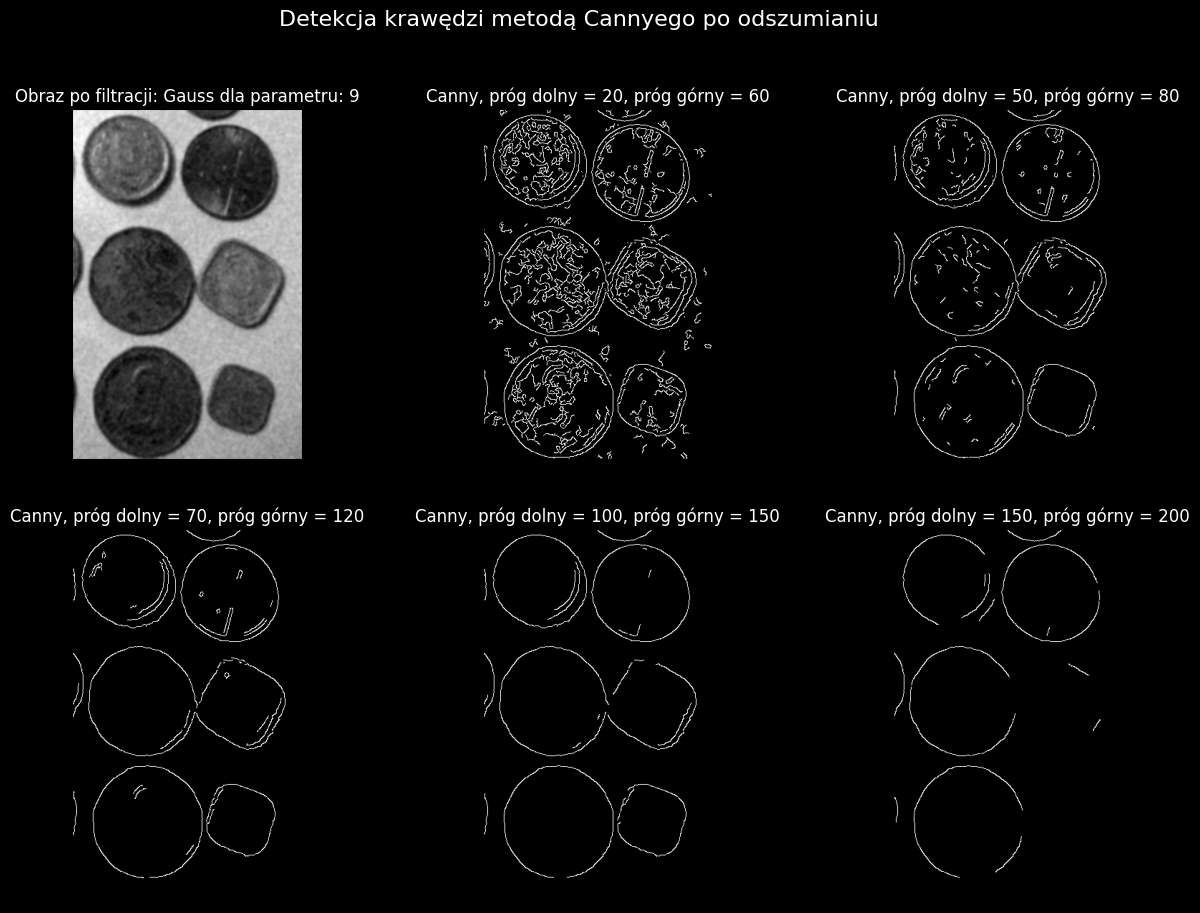

In [62]:
canny_detection(coins_noise, 'Gauss', 9)

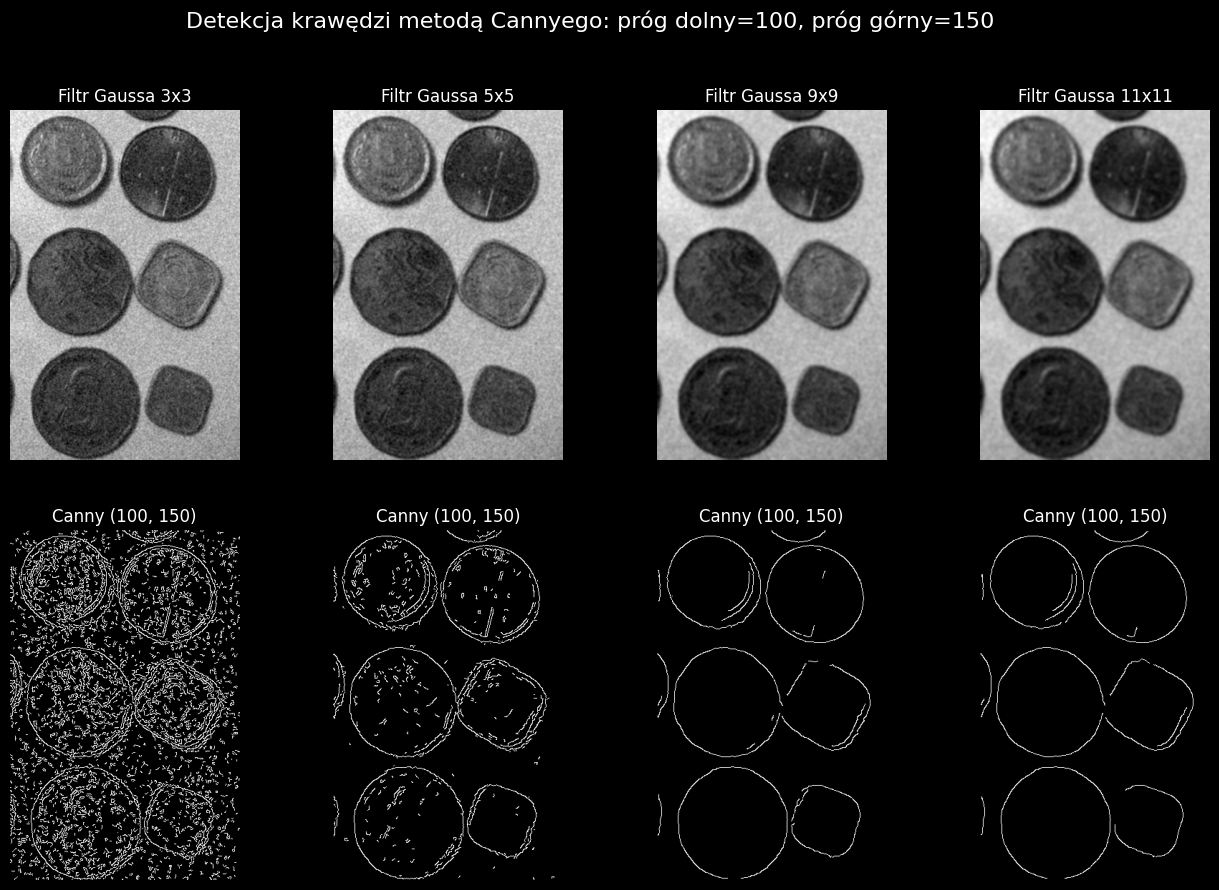

In [64]:
canny_for_gauss_params(coins_noise, min_thresh=100, max_thresh=150, param_values=[3, 5, 9, 11])

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów. Oceń uzyskaną zmianę w obrazie.

In [85]:
def plot_histogram(img, ax, title):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    ax.plot(hist, color='white')
    ax.set_title(title, color='white')
    ax.set_xlim([0, 256])
    ax.set_facecolor('black')
    ax.grid(False)


def plot_comparison(original_img, equalized_img):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10), facecolor='black')
    fig.suptitle('Wyrównanie Histogramu', color='white', fontsize=16)

    # Oryginalny obraz i jego histogram
    axs[0, 0].imshow(original_img, cmap='gray')
    axs[0, 0].set_title('Oryginalny Obraz', color='white')
    axs[0, 0].axis('off')
    plot_histogram(original_img, axs[1, 0], 'Histogram Oryginalny')

    # Obraz po wyrównaniu histogramu i jego histogram
    axs[0, 1].imshow(equalized_img, cmap='gray')
    axs[0, 1].set_title('Obraz po Wyrównaniu Histogramu', color='white')
    axs[0, 1].axis('off')
    plot_histogram(equalized_img, axs[1, 1], 'Histogram po Wyrównaniu')

    plt.show()

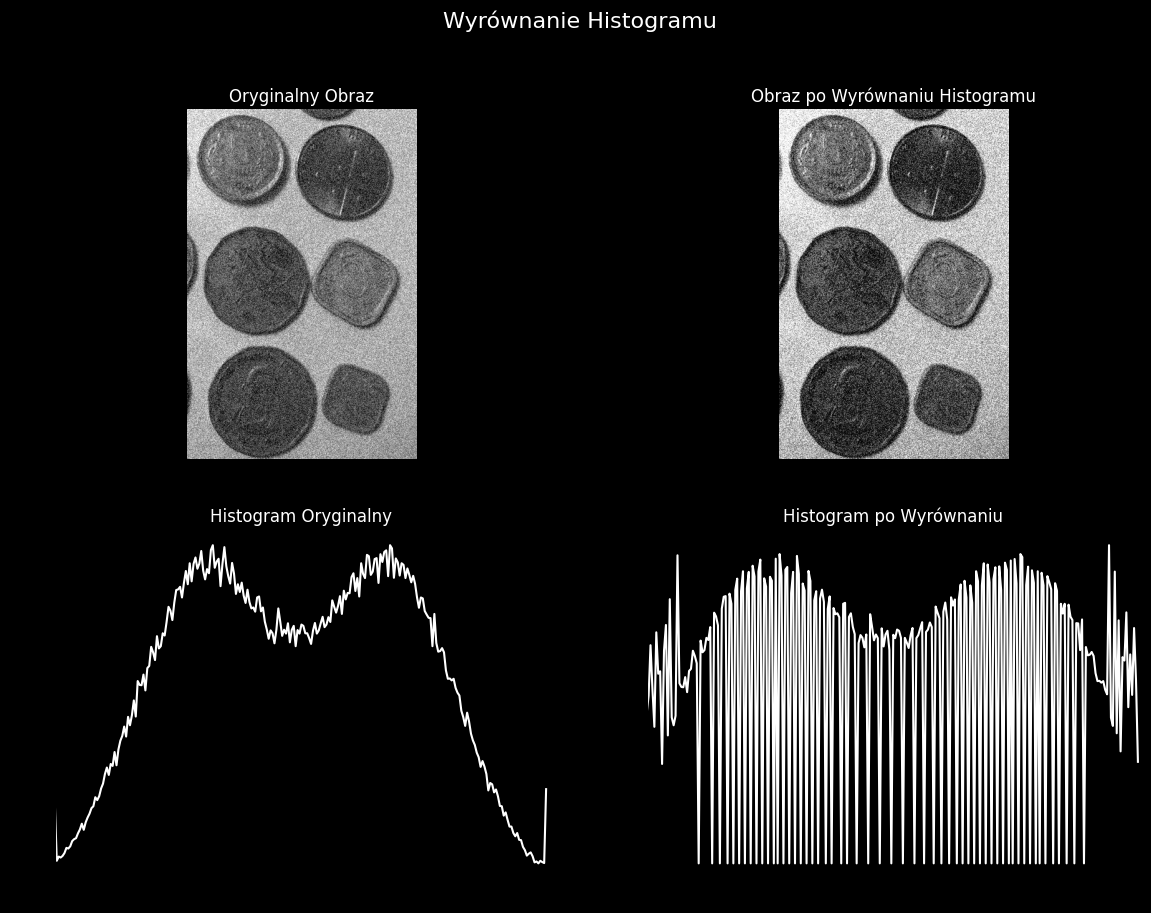

In [86]:
equalized_img = cv2.equalizeHist(coins_noise)
plot_comparison(coins_noise, equalized_img)

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazu `hare_gray` wykonaj transformację do wybranego (założonego przez siebie) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu. Zacznij od zastanowienia się nad doborem rozkładu docelowego (możesz zbadać zachowanie transformacji w zależności od wybranego rozkładu).

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

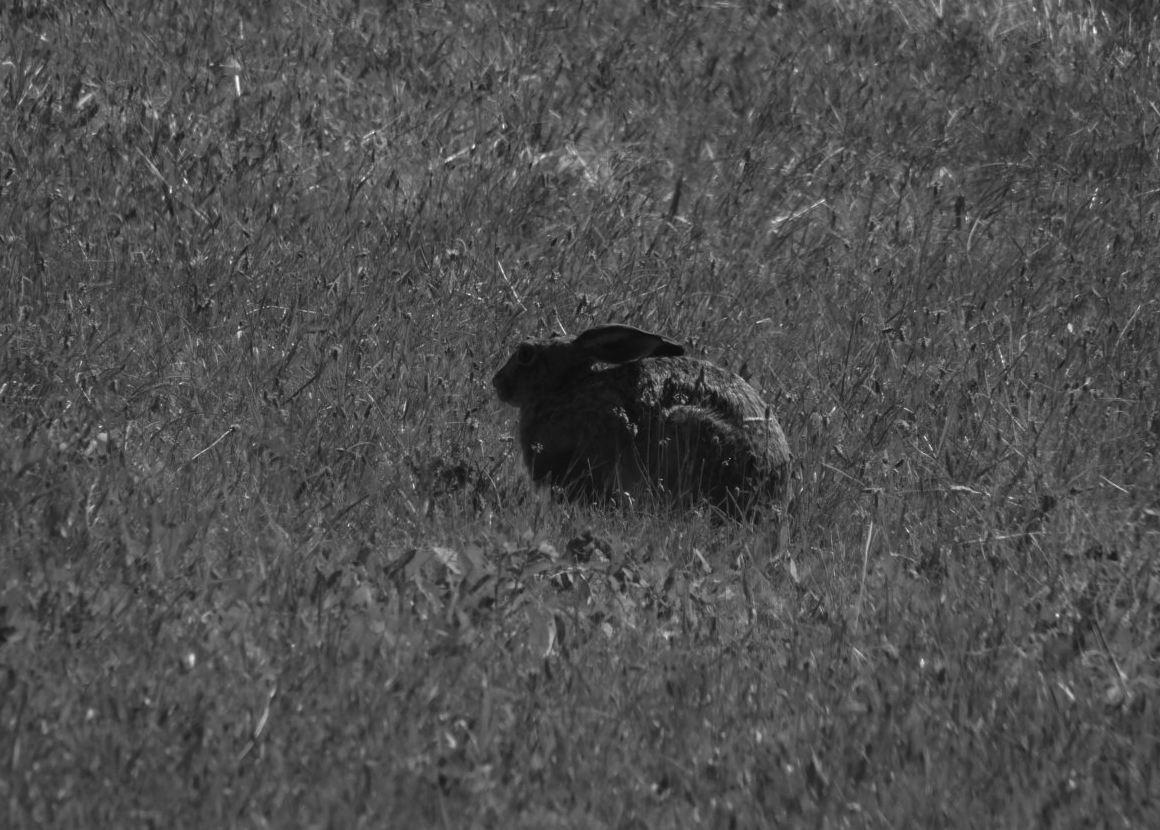

In [11]:
hare_gray = cv2.imread('Zajac.jpg', cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie:

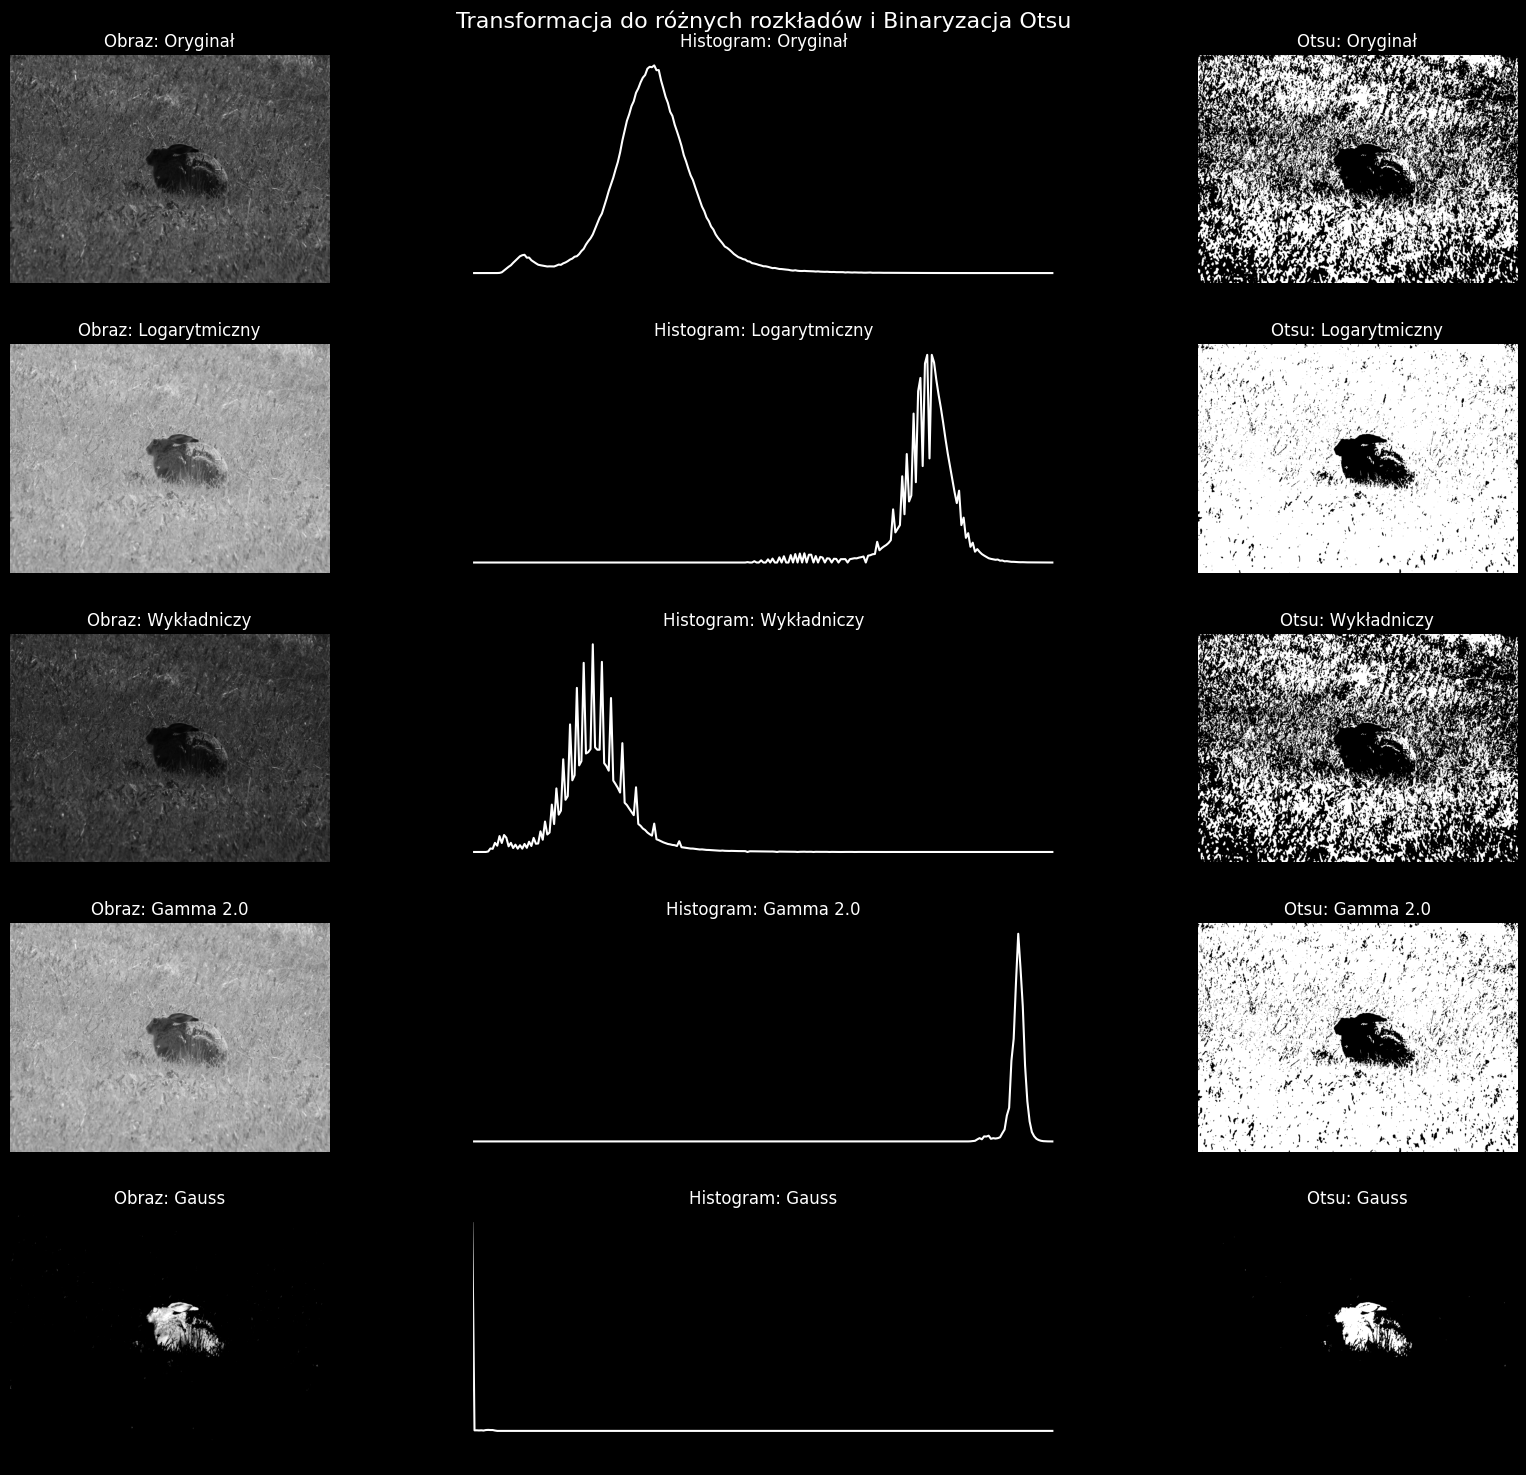

In [30]:
def plot_histogram(image, ax, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    ax.plot(hist, color='white')
    ax.set_title(title, color='white')
    ax.set_xlim([0, 256])
    ax.set_facecolor('black')
    ax.grid(False)

def apply_lut(image, lut):
    return cv2.LUT(image, lut)

def otsu_binarization(image):
    _, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu

#Różne LUT-y (liniowy, logarytmiczny, wykładniczy, gamma)
lut_log = np.array([np.clip(255 * np.log1p(i) / np.log1p(255), 0, 255) for i in range(256)], dtype=np.uint8)

lut_exp = np.array([np.clip(255 * (np.exp(i / 255) - 1) / (np.e - 1), 0, 255) for i in range(256)], dtype=np.uint8)

gamma = 0.05
lut_gamma = np.array([np.clip(255 * (i / 255) ** gamma, 0, 255) for i in range(256)], dtype=np.uint8)

mean = 15
sigma = 10
lut_gauss = np.array([np.clip(255 * (1 / (sigma * np.sqrt(2 * np.pi))) * 
                     np.exp(-0.5 * ((i - mean) / sigma) ** 2), 0, 255) for i in range(256)], dtype=np.uint8)

imgs = [
    ("Oryginał", hare_gray, None),
    ("Logarytmiczny", apply_lut(hare_gray, lut_log), lut_log),
    ("Wykładniczy", apply_lut(hare_gray, lut_exp), lut_exp),
    ("Gamma 2.0", apply_lut(hare_gray, lut_gamma), lut_gamma),
    ("Gauss", apply_lut(hare_gray, lut_gauss), lut_gauss),
]

fig, axs = plt.subplots(len(imgs), 3, figsize=(18, 15), facecolor='black')
fig.suptitle('Transformacja do różnych rozkładów i Binaryzacja Otsu', color='white', fontsize=16)

for i, (title, img, lut) in enumerate(imgs):
    axs[i, 0].imshow(img, cmap='gray')
    axs[i, 0].set_title(f'Obraz: {title}', color='white')
    axs[i, 0].axis('off')

    plot_histogram(img, axs[i, 1], f'Histogram: {title}')

    otsu_img = otsu_binarization(img)
    axs[i, 2].imshow(otsu_img, cmap='gray')
    axs[i, 2].set_title(f'Otsu: {title}', color='white')
    axs[i, 2].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

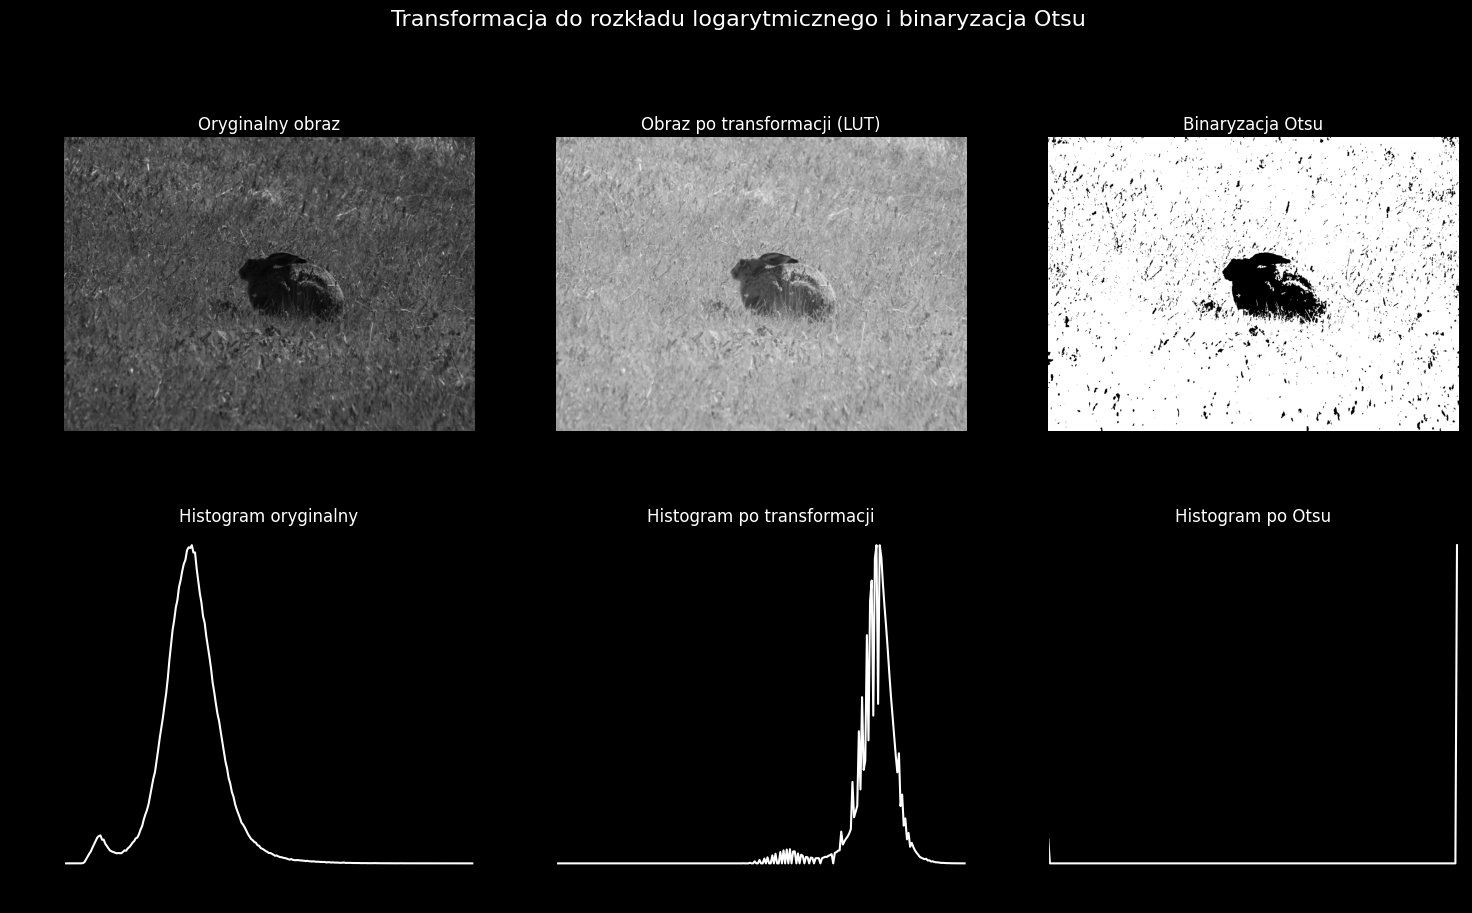

In [31]:
lut = np.array([np.clip(255 * np.log1p(i) / np.log1p(255), 0, 255) for i in range(256)], dtype=np.uint8)

transformed_img = apply_lut(hare_gray, lut)

otsu_result = otsu_binarization(transformed_img)

fig, axs = plt.subplots(2, 3, figsize=(18, 10), facecolor='black')
fig.suptitle('Transformacja do rozkładu logarytmicznego i binaryzacja Otsu', color='white', fontsize=16)

axs[0, 0].imshow(hare_gray, cmap='gray')
axs[0, 0].set_title('Oryginalny obraz', color='white')
axs[0, 0].axis('off')
plot_histogram(hare_gray, axs[1, 0], 'Histogram oryginalny')

axs[0, 1].imshow(transformed_img, cmap='gray')
axs[0, 1].set_title('Obraz po transformacji (LUT)', color='white')
axs[0, 1].axis('off')
plot_histogram(transformed_img, axs[1, 1], 'Histogram po transformacji')

axs[0, 2].imshow(otsu_result, cmap='gray')
axs[0, 2].set_title('Binaryzacja Otsu', color='white')
axs[0, 2].axis('off')
plot_histogram(otsu_result, axs[1, 2], 'Histogram po Otsu')

plt.show()

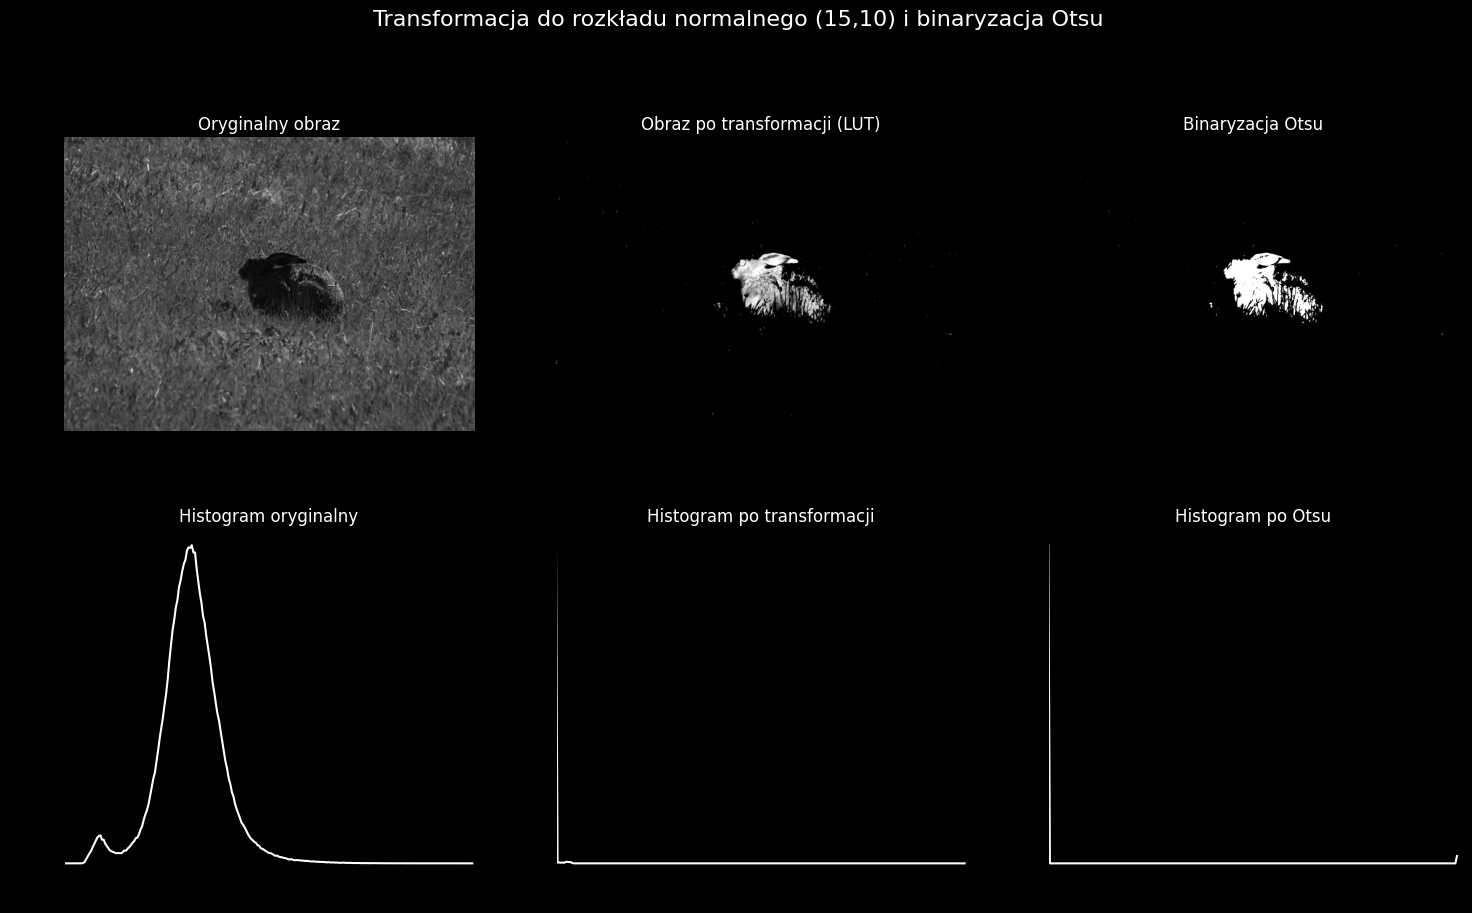

In [32]:
mean = 15
sigma = 10
lut_gauss = np.array([np.clip(255 * (1 / (sigma * np.sqrt(2 * np.pi))) * 
                     np.exp(-0.5 * ((i - mean) / sigma) ** 2), 0, 255) for i in range(256)], dtype=np.uint8)

transformed_img = apply_lut(hare_gray, lut_gauss)

otsu_result = otsu_binarization(transformed_img)

fig, axs = plt.subplots(2, 3, figsize=(18, 10), facecolor='black')
fig.suptitle('Transformacja do rozkładu normalnego (15,10) i binaryzacja Otsu', color='white', fontsize=16)

axs[0, 0].imshow(hare_gray, cmap='gray')
axs[0, 0].set_title('Oryginalny obraz', color='white')
axs[0, 0].axis('off')
plot_histogram(hare_gray, axs[1, 0], 'Histogram oryginalny')

axs[0, 1].imshow(transformed_img, cmap='gray')
axs[0, 1].set_title('Obraz po transformacji (LUT)', color='white')
axs[0, 1].axis('off')
plot_histogram(transformed_img, axs[1, 1], 'Histogram po transformacji')

axs[0, 2].imshow(otsu_result, cmap='gray')
axs[0, 2].set_title('Binaryzacja Otsu', color='white')
axs[0, 2].axis('off')
plot_histogram(otsu_result, axs[1, 2], 'Histogram po Otsu')

plt.show()